# --- Loan Approval Prediction ---




![My Image](loan_approved.png)


In [2]:
#importing Library
import pandas as pd

In [3]:
#Loading the dataset
cr = pd.read_csv(r"C:\Users\Aabshaar\Downloads\Python_dataset\CreditRisk.csv")
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [4]:
#Displaying top 5 records
cr.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Displaying last 5 records
cr.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [6]:
#checking shape
cr.shape

(981, 13)

In [7]:
#It has 981 records and 13 columns

In [8]:
#displaying columns name
cr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#Dropping 'Loan_ID' column bec there's no use of it
cr = cr.drop(['Loan_ID'], axis = 1)

cr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# ---------- Model Cleaning Part ----------

# Finding nulls

In [10]:
cr.isnull().sum()[cr.isnull().sum() > 0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

# Filling the nulls values

In [11]:
cr.Gender.fillna('Male', inplace = True)
cr.Married.fillna('Yes', inplace = True)
cr.Dependents.fillna(0.0, inplace = True)
cr.Education.fillna('Graduate', inplace = True)
cr.Self_Employed .fillna('No', inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(), inplace = True)
cr.Loan_Amount_Term .fillna(cr.Loan_Amount_Term.mean(), inplace = True)
cr.Credit_History .fillna(0.0, inplace = True)
cr.Property_Area.fillna('Semiurban', inplace = True)
cr.Loan_Status.fillna('Y', inplace = True)

In [12]:
#checking if all the nulls values are filled value
cr.isnull().sum()[cr.isnull().sum() > 0]

Series([], dtype: int64)

# Replace nulls

In [13]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 92.1+ KB


In [ ]:
#we have 6 objects. Let's convert them into int(numbers) 

In [ ]:
#Using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
cr[cr.select_dtypes(include = 'object').columns] = cr[cr.select_dtypes(include = 'object').columns] .apply(le.fit_transform)


In [18]:
#checking if any object is there or no
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        981 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 69.1 KB


# Model Building

In [19]:
#importing Library
from sklearn.model_selection import train_test_split

In [20]:
#Seeing where our Target Var is..
cr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
train, test = train_test_split(cr, test_size=.20)

train_x = train.iloc[:, 0:-1] 
train_y = train.iloc[:, -1]

test_x = test.iloc[:, 0:-1]
test_y = test.iloc[:, -1]

# Logestic Regression

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
from sklearn.linear_model import LogisticRegression    #importing
logreg = LogisticRegression()                          #creating a function of it & Storing it in a variable named as 'logreg'

logreg.fit(train_x, train_y)                            #model is created

pred_logreg = logreg.predict(test_x)                    #prediction
print(confusion_matrix(test_y, pred_logreg))            #printing confusion matrix
print(classification_report(test_y, pred_logreg))       #printing classification report

[[ 26  25]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        51
           1       0.85      0.95      0.89       146

    accuracy                           0.83       197
   macro avg       0.81      0.73      0.75       197
weighted avg       0.83      0.83      0.82       197



C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import accuracy_score

logreg_accuracy = accuracy_score(test_y, pred_logreg)
print("Logistic Regression Accuracy = ",logreg_accuracy)

Logistic Regression Accuracy =  0.8324873096446701


In [55]:
from sklearn.linear_model import LogisticRegression    #importing
logreg = LogisticRegression()                          #creating a function of it & Storing it in a variable named as 'logreg'

logreg.fit(train_x, train_y)                            #model is created

pred_logreg = logreg.predict(test_x)                    #prediction
print(confusion_matrix(test_y, pred_logreg))            #printing confusion matrix
print(classification_report(test_y, pred_logreg))       #printing classification report

[[ 26  25]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        51
           1       0.85      0.95      0.89       146

    accuracy                           0.83       197
   macro avg       0.81      0.73      0.75       197
weighted avg       0.83      0.83      0.82       197



C:\Users\Aabshaar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(train_x, train_y)

pred_dt = dt.predict(test_x)
print(confusion_matrix(test_y, pred_dt))            
print(classification_report(test_y, pred_dt)) 

[[ 23  28]
 [ 22 124]]
              precision    recall  f1-score   support

           0       0.51      0.45      0.48        51
           1       0.82      0.85      0.83       146

    accuracy                           0.75       197
   macro avg       0.66      0.65      0.66       197
weighted avg       0.74      0.75      0.74       197



In [26]:
dt_accuracy = accuracy_score(test_y, pred_dt)
print("Decision Tree Accuracy = ",dt_accuracy)

Decision Tree Accuracy =  0.7461928934010152


In [ ]:
#accuracy has dropped

# Hyper Parameter Tuning

In [28]:
#importing library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #to get the best combination of hyper parameter

#creating a dictionary
search_dict = { "criterion" : ['gini', 'entropy'],
               "max_depth" : [5, 10, 20],
               "min_samples_split" :  [2, 5, 10, 20]
              } 



# Initialize DecisionTreeRegressor
new_dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid = GridSearchCV(new_dt, param_grid= search_dict)

# Fit the model
grid.fit(train_x, train_y)

# Get the best parameters
best_params = grid.best_params_
print("Best Hyperparameters are:", best_params)


Best Hyperparameters are: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 20}


In [ ]:
'''

The Best Hyperparameters Are:

Criterion: 'gini'
Max Depth: 5
Min Samples Split: 20

'''

# Building DecisionTree with the best hyperparameters

In [45]:
best_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=20)

# Train the model on the entire training dataset
best_dt_model.fit(train_x, train_y)

# Make predictions on the testing dataset
predictions = best_dt_model.predict(test_x)

# Evaluate the model 
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))


[[ 26  25]
 [ 10 136]]
              precision    recall  f1-score   support

           0       0.72      0.51      0.60        51
           1       0.84      0.93      0.89       146

    accuracy                           0.82       197
   macro avg       0.78      0.72      0.74       197
weighted avg       0.81      0.82      0.81       197



In [46]:
dt_hpt_accuracy = accuracy_score(test_y, predictions)
print("Decision Tree HPT Accuracy = ",dt_hpt_accuracy)

Decision Tree HPT Accuracy =  0.8223350253807107


# Comparing Decision Tree Accuracy before and after HPT  

In [57]:
print("Before HPT Accuracy = ", dt_accuracy)
print("After  HPT Accuracy = ", dt_hpt_accuracy)

Before HPT Accuracy =  0.7461928934010152
After  HPT Accuracy =  0.8223350253807107


In [ ]:
#Accuarcy has improved after Hyper Parameter Tuning

# Random Forest

In [59]:
# Experimenting with different algorithms, ensemble methods
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(train_x, train_y) #model is build

# Evaluate the Random Forest model
pred_rf = rf.predict(test_x)
print(confusion_matrix(test_y, pred_rf))            
print(classification_report(test_y, pred_rf)) 

[[ 26  25]
 [  7 139]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62        51
           1       0.85      0.95      0.90       146

    accuracy                           0.84       197
   macro avg       0.82      0.73      0.76       197
weighted avg       0.83      0.84      0.82       197



In [63]:
rf_accuracy = accuracy_score(test_y, pred_rf)
print("Random Forest Accuracy = ",rf_accuracy)

Random Forest Accuracy =  0.8375634517766497


# Feature Importance

In [71]:
df = pd.DataFrame()
df['Feature'] = train_x.columns
df['Importance'] = rf.feature_importances_

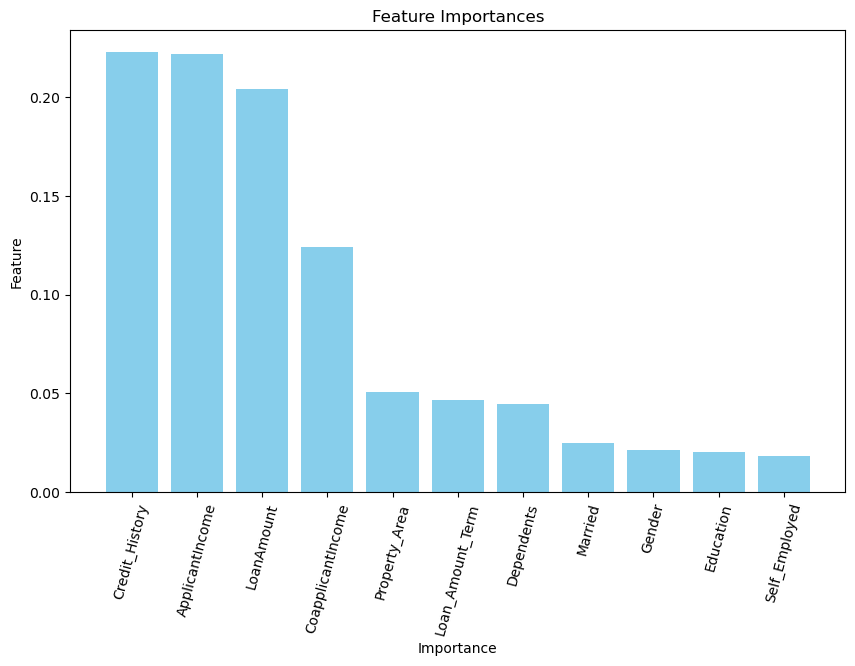

In [49]:
# Ploting feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Feature'], df['Importance'], color='skyblue')
plt.xticks(rotation = 75)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [37]:
df = df.sort_values('Importance', ascending=False) #sorting it
df.head(5) #displaying top5 records

,Feature,Importance
9,Credit_History,0.222861
5,ApplicantIncome,0.221991
7,LoanAmount,0.204099
6,CoapplicantIncome,0.124108
10,Property_Area,0.050943


In [50]:
cr = cr.loc[: ,['Loan_Status', 'Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area']]  #Selecing those top5 records and Target var
cr.head(2) 

,Loan_Status,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area
0,1,1.0,5849,142.51153,0.0,2
1,0,1.0,4583,128.00000,1508.0,0


In [51]:
cr_x = cr.iloc[: , 1::]
cr_y = cr.Loan_Status

In [52]:
from sklearn.ensemble import RandomForestClassifier
cr_rf = RandomForestClassifier()

cr_rf.fit(cr_x, cr_y) 

pred_cr_rf = cr_rf.predict(cr_x)
print(confusion_matrix(cr_y, pred_cr_rf))         
print(classification_report(cr_y, pred_cr_rf))       

[[269   0]
 [  0 712]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       712

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



In [53]:
rf_fi_accuracy = accuracy_score(cr_y, pred_cr_rf)
print("Random Forest Feature Importance Accuracy = ",rf_fi_accuracy)

Random Forest Feature Importance Accuracy =  1.0


# <span style="color:brown">Comparing All Results</span>


In [64]:
print("Logestic Regression Accuracy       = ", logreg_accuracy)
print("Decision Tree, Before HPT Accuracy = ", dt_accuracy)
print("Decision Tree, After  HPT Accuracy = ", dt_hpt_accuracy)
print("Random Forest Accuracy             = ", rf_accuracy)

Logestic Regression Accuracy       =  0.8324873096446701
Decision Tree, Before HPT Accuracy =  0.7461928934010152
Decision Tree, After  HPT Accuracy =  0.8223350253807107
Random Forest Accuracy             =  0.8375634517766497


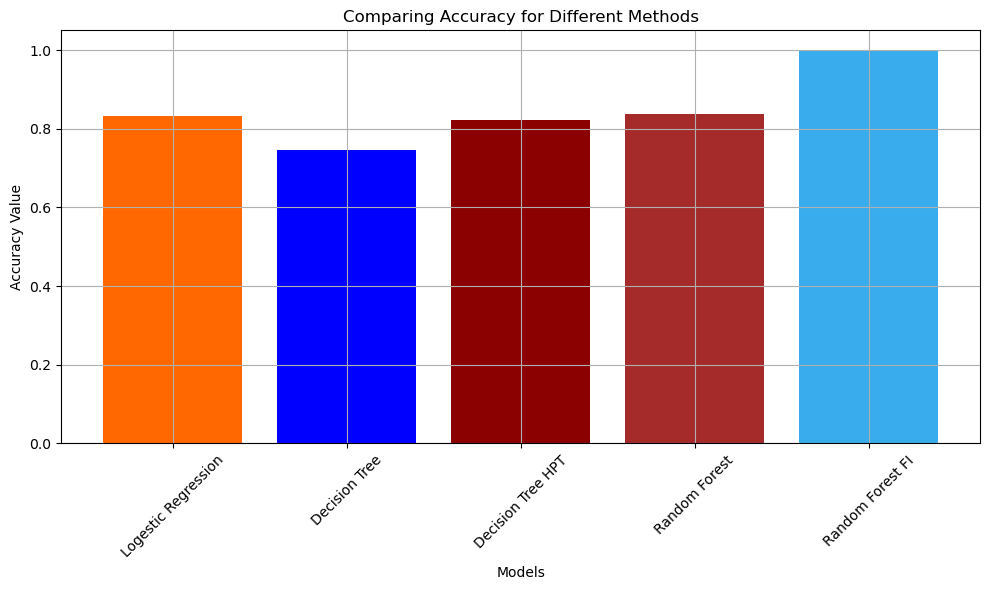

In [65]:
# Accuracy values for each method on test data
methods     = ['Logestic Regression', 'Decision Tree', 'Decision Tree HPT', 'Random Forest', 'Random Forest FI']
mse_values = [logreg_accuracy, dt_accuracy, dt_hpt_accuracy, rf_accuracy, rf_fi_accuracy]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, mse_values, color=['#FF6700', 'blue', 'darkred', 'brown', '#38ACEC'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Value')
plt.title('Comparing Accuracy for Different Methods')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
'''

We can conclude that both Logestic Regression and Random Forest are giving the best result.

'''